In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect

In [2]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

inspector = inspect(engine)
print(inspector.get_table_names())

['measurement', 'station']


In [3]:
columns = inspector.get_columns("measurement")
for c in columns:
    print(c["name"], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [4]:
columns = inspector.get_columns("station")
for c in columns:
    print(c["name"], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Precipitation Analysis

In [40]:
query = """
        select 
            date,
            prcp
        from
            measurement
        """

In [41]:
conn = engine.connect()
df = pd.read_sql(query, con=conn)
conn.close()

In [42]:
df.tail()

,date,prcp
19545,2017-08-19,0.09
19546,2017-08-20,NaN
19547,2017-08-21,0.56
19548,2017-08-22,0.50
19549,2017-08-23,0.45


In [45]:
df["date"] = pd.to_datetime(df["date"])
last_year = df.loc[df["date"] >= "2016-08-24"].reset_index(drop=True)
last_year

,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01
...,...,...
2218,2017-08-19,0.09
2219,2017-08-20,NaN
2220,2017-08-21,0.56
2221,2017-08-22,0.50


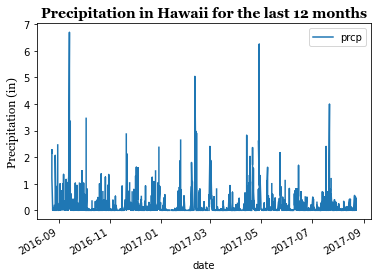

In [46]:
last_year.set_index("date").plot()
plt.title("Precipitation in Hawaii for the last 12 months", fontweight="bold", fontsize=14, fontname="Georgia")
plt.ylabel("Precipitation (in)", fontsize=12, fontname="Georgia")

plt.show()

In [47]:
last_year.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

In [48]:
query = """
        select 
            count(*) as stations
        from
            station
        """

In [49]:
conn = engine.connect()
df = pd.read_sql(query, con=conn)
conn.close()
df

,stations
0,9


In [50]:
query = """
        SELECT
            s.station,
            count(*) as observations
        FROM
            station s
        JOIN measurement m on s.station = m.station
        GROUP BY s.station
        ORDER BY
            count(*) desc
        """

In [51]:
conn = engine.connect()
df = pd.read_sql(query, con=conn)
conn.close()
df

,station,observations
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [54]:
query = """
        SELECT
            m.date,
            m.tobs,
            s.station
        FROM
            station s
        JOIN measurement m on s.station = m.station
        ORDER BY
            date
        """

In [55]:
conn = engine.connect()
df = pd.read_sql(query, con=conn)
conn.close()
df

,date,tobs,station
0,2010-01-01,65.0,USC00519397
1,2010-01-01,67.0,USC00513117
2,2010-01-01,72.0,USC00518838
3,2010-01-01,75.0,USC00519523
4,2010-01-01,70.0,USC00519281
...,...,...,...
19545,2017-08-22,76.0,USC00516128
19546,2017-08-23,81.0,USC00519397
19547,2017-08-23,82.0,USC00514830
19548,2017-08-23,82.0,USC00519523


In [56]:
df["date"] = pd.to_datetime(df["date"])
last_year = df.loc[df["date"] >= "2016-08-24"].reset_index(drop=True)
last_year

,date,tobs,station
0,2016-08-24,79.0,USC00519397
1,2016-08-24,76.0,USC00513117
2,2016-08-24,80.0,USC00514830
3,2016-08-24,78.0,USC00517948
4,2016-08-24,79.0,USC00519523
...,...,...,...
2218,2017-08-22,76.0,USC00516128
2219,2017-08-23,81.0,USC00519397
2220,2017-08-23,82.0,USC00514830
2221,2017-08-23,82.0,USC00519523


In [76]:
last_year.groupby("station").size().sort_values(ascending=False)

station
USC00519397    360
USC00519281    351
USC00516128    348
USC00513117    342
USC00519523    336
USC00514830    304
USC00517948    182
dtype: int64

In [77]:
observed_df = last_year.loc[last_year.station == "USC00519397"].reset_index(drop=True)

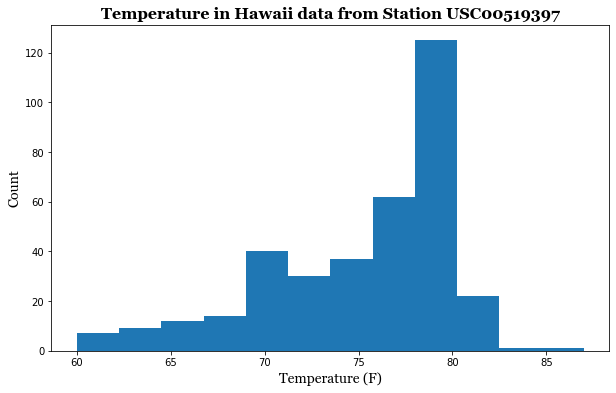

In [80]:
plt.figure(figsize=(10,6))
plt.hist(observed_df.tobs, bins=12)
plt.title("Temperature in Hawaii data from Station USC00519397", fontweight="bold", fontsize=16, fontname="Georgia")
plt.ylabel("Count", fontsize=14, fontname="Georgia")
plt.xlabel("Temperature (F)", fontsize=14, fontname="Georgia")

plt.show()

In [81]:
observed_df.describe()

,tobs
count,360.000000
mean,75.194444
std,4.961239
min,60.000000
25%,72.000000
50%,77.000000
75%,79.000000
max,87.000000
